<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from fastai.vision.all import *
import torch
from ipywidgets import widgets
import seaborn as sns

In [ ]:
#!pip install -r requirements.txt

In [4]:
#torch.cuda.is_available() #gpu check

True

In [30]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"shavkatshoniyozov","key":"29d0e9b91e272a5f9351f36bd7329332"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c pnevmoniya

100% 1.14G/1.14G [00:39<00:00, 34.9MB/s]
100% 1.14G/1.14G [00:40<00:00, 30.6MB/s]


In [ ]:
#!unzip '/content/pnevmoniya.zip'

In [185]:
#path 
path = Path('/content/train')
path.ls()

(#2) [Path('/content/train/NORMAL'),Path('/content/train/PNEUMONIA')]

In [105]:
#checking number of files
fls = get_image_files(path)
fls

(#5216) [Path('/content/train/NORMAL/IM-0227-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-0876-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-0673-0001.jpeg'),Path('/content/train/NORMAL/IM-0671-0001.jpeg'),Path('/content/train/NORMAL/IM-0329-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-1345-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-0885-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-1164-0001.jpeg'),Path('/content/train/NORMAL/NORMAL2-IM-0516-0001.jpeg'),Path('/content/train/NORMAL/IM-0237-0001.jpeg')...]

In [38]:
#failed files
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

In [52]:
train_data =  []
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data


,image,label


In [64]:
normal_cases = path/'NORMAL'
pneumonia_cases = path/'PNEUMONIA'

#list of images
normal = normal_cases.glob('*.jpeg')
pneumonia = pneumonia_cases.glob('*.jpeg')

#empty list for making df
train = []

#add images to list with label #normal cases will be 0 while pneumonia will be 1
for img in normal:
    train.append((img, 0))

for img in pneumonia:
    train.append((img, 1))

#dataframe
df = pd.DataFrame(train, columns=['image', 'label'], index=None)

In [63]:
df.sample(10)

,image,label
4901,/content/train/PNEUMONIA/person61_bacteria_294.jpeg,1
2223,/content/train/PNEUMONIA/person387_virus_772.jpeg,1
762,/content/train/NORMAL/IM-0309-0001.jpeg,0
3741,/content/train/PNEUMONIA/person296_bacteria_1394.jpeg,1
710,/content/train/NORMAL/IM-0553-0001-0002.jpeg,0
431,/content/train/NORMAL/NORMAL2-IM-1086-0001.jpeg,0
4393,/content/train/PNEUMONIA/person1426_virus_2439.jpeg,1
4693,/content/train/PNEUMONIA/person799_bacteria_2705.jpeg,1
1625,/content/train/PNEUMONIA/person1940_bacteria_4861.jpeg,1
4527,/content/train/PNEUMONIA/person1916_bacteria_4821.jpeg,1


In [66]:
#check how many normal and pneumonia cases in df
df.label.value_counts()

1    3875
0    1341
Name: label, dtype: int64

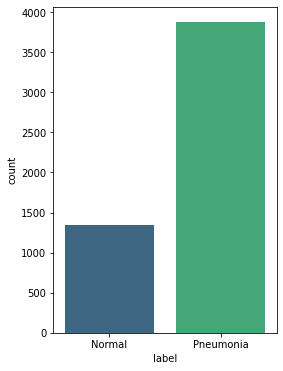

In [103]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df, x='label', palette='viridis')
ax.set_xticklabels(['Normal', 'Pneumonia'])
plt.show()

# **Deep Learning model**

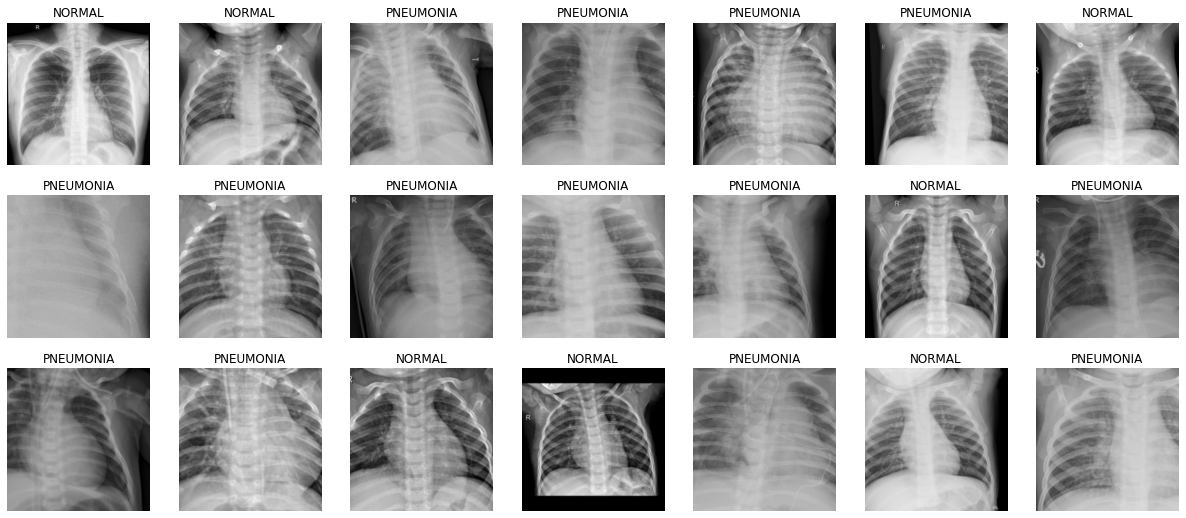

In [186]:
#datablock
disease = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=41),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader
dls = disease.dataloaders(path)

#checking dataset
dls.train.show_batch(max_n=21, nrows=3)

In [189]:
res152 = cnn_learner(dls, resnet152, metrics=accuracy)
res152.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.394404,0.207475,0.928983,01:55


epoch,train_loss,valid_loss,accuracy,time
0,0.166841,0.075981,0.978887,02:16
1,0.093213,0.030853,0.986564,02:16
2,0.043636,0.018944,0.996161,02:15


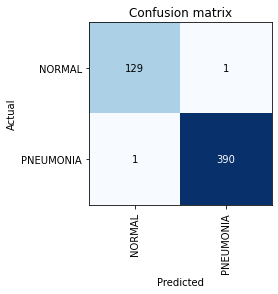

In [195]:
#resnet152
interp = ClassificationInterpretation.from_learner(res152)
interp.plot_confusion_matrix()

In [191]:
#res101 = cnn_learner(dls, resnet101, metrics=accuracy)
#res101.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.365387,0.162285,0.953935,01:41


epoch,train_loss,valid_loss,accuracy,time
0,0.136539,0.169986,0.955854,01:49
1,0.074620,0.040992,0.988484,01:49
2,0.031794,0.020804,0.990403,01:50


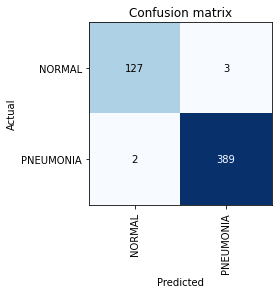

In [192]:
#resnet101
#interp = ClassificationInterpretation.from_learner(res101)
#interp.plot_confusion_matrix()

In [193]:
#res50 = cnn_learner(dls, resnet50, metrics=accuracy)
#res50.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.417023,0.154466,0.950096,01:31


epoch,train_loss,valid_loss,accuracy,time
0,0.156550,0.128399,0.969290,01:37
1,0.079054,0.035506,0.988484,01:37
2,0.033018,0.034539,0.988484,01:37


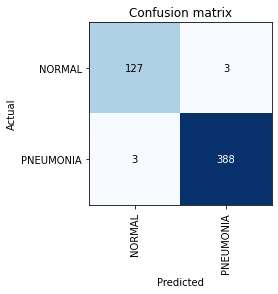

In [194]:
#resnet50
#interp = ClassificationInterpretation.from_learner(res50)
#interp.plot_confusion_matrix()

In [187]:
#learn = cnn_learner(dls, resnet18, metrics=accuracy)
#learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.437273,0.187827,0.950096,01:23


epoch,train_loss,valid_loss,accuracy,time
0,0.142308,0.070017,0.980806,01:43
1,0.094026,0.031654,0.990403,01:38
2,0.047741,0.034451,0.988484,01:32


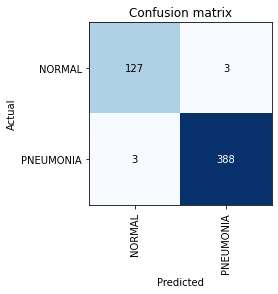

In [188]:
#resnet18
#interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()

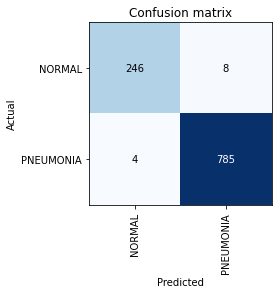

In [45]:
#resnet34
#interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()

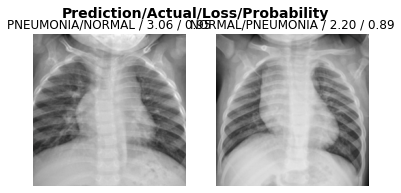

In [198]:
#mistaken pictures in the model
interp.plot_top_losses(2, nrows=1)

In [210]:
path1 = Path('.')
test_cases = path1/'test'

#get list of images
test = test_cases.glob('*.jpeg')

#empty list for making df
row_list = []

for img in test:
  row, pred, probs = res152.predict(img)
  row_list.append((img.name, pred.item()))
  
#dataframe
df = pd.DataFrame(row_list, columns=['id', 'labels'])

In [211]:
df.head()

,id,labels
0,test_img_10067.jpeg,1
1,test_img_10279.jpeg,1
2,test_img_10249.jpeg,0
3,test_img_10337.jpeg,1
4,test_img_10602.jpeg,1


In [212]:
df.to_csv('pneumonia_diagnosis_res152.csv', index=False)

In [213]:
pd.read_csv('/content/pneumonia_diagnosis_res152.csv')

,id,labels
0,test_img_10067.jpeg,1
1,test_img_10279.jpeg,1
2,test_img_10249.jpeg,0
3,test_img_10337.jpeg,1
4,test_img_10602.jpeg,1
...,...,...
619,test_img_10514.jpeg,1
620,test_img_10046.jpeg,1
621,test_img_10463.jpeg,1
622,test_img_10116.jpeg,0
